# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Изучение данных из файла

Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Рассмотрим выборку описательной статистики и самой информации о датасетах по каждой таблице.

### Рассмотрим таблицу  users (информация о пользователях).

In [3]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


Необходимо изменить тип данных по столбцу - reg_date (дата подключения тарифа (день, месяц, год)) на datetime. 

Также следует добавить столбцы: месяц, время года.

### Посмотрим таблицу calls (информация о звонках).

In [5]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице содержится 202 607 строк данных. 

Данные полные, пропещунных данных не иметтся. 

Необходимо изменить тип данных по столбцу - call_date (дата звонка) на datetime.

### Посмотрим таблицу messages (информация о сообщениях).

In [7]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице содержится 123 036 строк данных. 

Данные полные, пропещунных данных не иметтся. 

Необходимо изменить тип данных по столбцу - message_date (дата сообщения) на datetime.

### Посмотрим таблицу internet (информация об интернет-сессиях).

In [9]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице содержится 149 396 строк данных.

Данные полные, пропещунных данных не иметтся.

Необходимо изменить тип данных по столбцу - session_date (дата интернет-сессии) на datetime.

### Посмотрим таблицу tariffs (информация о тарифах).

In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о трафиках) содержит условия по трафикам. Проблем по данной таблице нет и не должно быть.

# Промежуточный вывод

Была просмотрена информация о датасетах по каждой таблице и сделаны предвательные выводы.

Для достижения поставленной задачи необходимо решить вопросы по следующим пунктам:
- просмотреть данные и найти анамальные значения;
- найти и обработать пропущенные значения;
- заменить некорректные типы данных;
- найти и удалить дублирующие значения.

## Предобработка данных

### Рассмотрим таблицу users (информация о пользователях).

Произведем проверку пользователей на уникальность и наличие дубликатов.

In [12]:
print("Число строк в датафрейме users:", users.shape[0])
print("Число уникальных пользователей:", users['user_id'].count())
print("Число дубликатов:", users.duplicated().sum())

Число строк в датафрейме users: 500
Число уникальных пользователей: 500
Число дубликатов: 0


Все пользователи являются уникальными. Дублирующих значений не наблюдается.

Рассмотрим информацию о наличии пропусков.

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Можем заметить, что по столбцу churn_date (дата прекращения пользования тарифом) наблюдается довольно много пропущенных значений. По условию задачи сказанно: если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Тем самым, мы можем оставить даннные без изменения. Для решения поставленной задачи они нам не нужны.

Произведем замену типа данных и добавление столбцов: месяц, время года чуть позже.

### Рассмотрим таблицу calls (информация о звонках).

Построим гистограмму распределения длительности звонков и посмотрим на полученный результат.

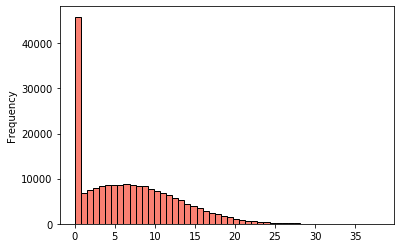

In [14]:
plt.style.use('seaborn-pastel')
calls['duration'].plot(kind='hist', color='salmon', ec='black', bins=50)

Видим, что имеются звонки околонулевой длительности. В задании сказано: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Следует округлить значения в большую сторону. Воспользуется методом np.ceil.

In [15]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


Повторно посмотрим на гистограмму распределения длительности звонков.

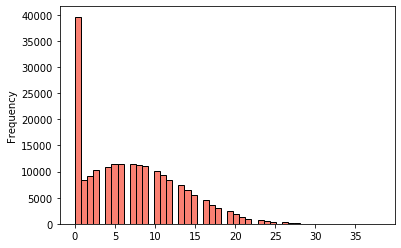

In [16]:
calls['duration'].plot(kind='hist', color='salmon', ec='black', bins=50)

Рассмотрим поближе звонки околонулевой длительности.

In [17]:
calls.query('duration == 0.0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Данных звонков наблюдается около 40 тысяч. Проверим, относятся ли данные звонки к одному тарифу. Можно предположить, что по какому-то тарифу данные округлились не верно, в то время как должны были окргулиться в большую сторону (до 1 минуты).

In [18]:
map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
calls['Тариф'] = calls['user_id'].map(map_to_fill_tariff)
calls['Тариф'].value_counts()

smart    130315
ultra     72292
Name: Тариф, dtype: int64

Предполагаемая гипотеза не подтвердилась. По каждому тарифу имеются нулевые звонки. Тогда, можно предложить, что данные звонки являются не состоявшиеся. Нулевые значения могут иметь происхождение: 

- прерывание связи в случае, когда другой абонент был "занят/недоступен";
- прерывание связи в случае, когда произошел моментальный сброс вызова после состоявшегося дозвона.

Так как данные случаи не расходуют лимит минут и не принимают участия в формировании конечной выручки компании - предлагется удалить данные строки.

In [19]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

Проверим.

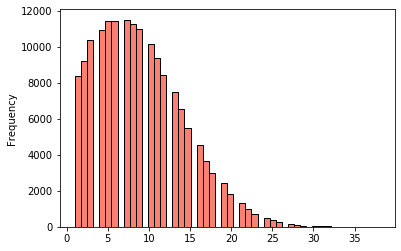

In [20]:
calls['duration'].plot(kind='hist', color='salmon', ec='black', bins=50)

Произведем замену типа данных и добавление столбцов: месяц, время года чуть позже.

### Рассмотрим таблицу messages (информация о сообщениях).

Произведем замену типа данных и добавление столбцов: месяц, время года чуть позже.

### Рассмотрим таблицу internet (информация об интернет-сессиях).

В задании сказано: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Следует округлить значения в большую сторону. Воспользуется методом np.ceil.

In [21]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000
5,5,1000_5,400.0,2018-10-02,1000
6,6,1000_6,541.0,2018-09-07,1000
7,7,1000_7,416.0,2018-07-11,1000
8,8,1000_8,506.0,2018-10-08,1000
9,9,1000_9,346.0,2018-09-03,1000


Построим гистограмму распределения использования интернет-трафика в сессиях.

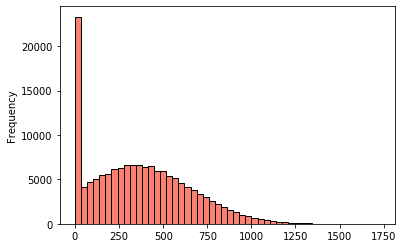

In [22]:
internet['mb_used'].plot(kind='hist', color='salmon', ec='black', bins=50)

Рассмотрим строки с нулевым объёмом потраченного за сессию интернет-трафиком.

In [23]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


Данных строк наблюдается около 20 тысяч. Можно предложить, что данные сессии -это включенное подключение к интернету без дальнейшего использования и без единой произвденной операции. Например, случаи, когда появляется и сразу пропадает связь. Данные строки следует исключить из датафрейма.

In [24]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

Поссмотрим.

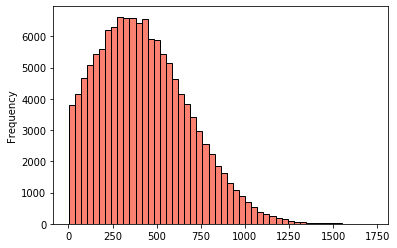

In [25]:
internet['mb_used'].plot(kind='hist', color='salmon', ec='black', bins=50)

Произведем замену типа данных и добавление столбцов: месяц, время года чуть позже.

### Изменения формата столбца на datetime и добавление столбцов "месяц" и "время года".

Напишем функцию для изменения формата столбца на datetime и добавление столбцов "месяц" и "время года".

По каждой из таблиц:

- users (информация о пользователях);
- calls (информация о звонках);
- messages (информация о сообщениях);
- internet (информация об интернет-сессиях)

есть столбцы, где необходимо изменить тип данных на datetime. Также добавим столбцы "месяц" и "время года". Для начала напишем функцию определения времени года.

In [26]:
def get_season(date):
    if date.month in [1, 2, 12]:
        return 'зима'
    elif date.month in [3, 4, 5]:
        return 'весна'
    elif date.month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

Напишем функцию, где столбец будет в формате datetime, а также добавлением столбцы "месяц" и "время года".

In [27]:
def date_to_dt_month_season(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['месяц'] = df[column].apply(lambda x: x.month)
                df['время года'] = df[column].apply(get_season)

In [28]:
date_to_dt_month_season([users, calls, messages, internet])

Проверим.

In [29]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,месяц,время года
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,весна
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,осень
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,лето
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8,лето
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,весна


In [30]:
calls.head()

,id,call_date,duration,user_id,Тариф,месяц,время года
2,1000_2,2018-06-11,3.0,1000,ultra,6,лето
3,1000_3,2018-09-21,14.0,1000,ultra,9,осень
4,1000_4,2018-12-15,6.0,1000,ultra,12,зима
7,1000_7,2018-08-22,19.0,1000,ultra,8,лето
8,1000_8,2018-09-15,19.0,1000,ultra,9,осень


In [31]:
messages.head()

,id,message_date,user_id,месяц,время года
0,1000_0,2018-06-27,1000,6,лето
1,1000_1,2018-10-08,1000,10,осень
2,1000_2,2018-08-04,1000,8,лето
3,1000_3,2018-06-16,1000,6,лето
4,1000_4,2018-12-05,1000,12,зима


In [32]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,месяц,время года
0,0,1000_0,113.0,2018-11-25,1000,11,осень
1,1,1000_1,1053.0,2018-09-07,1000,9,осень
2,2,1000_2,1198.0,2018-06-25,1000,6,лето
3,3,1000_3,551.0,2018-08-22,1000,8,лето
4,4,1000_4,303.0,2018-09-24,1000,9,осень


Выполенно.

# Промежуточный вывод

По разделу 2 "Предобработка данных" была продела следующая работа:

- просмотрены данные и найдены анамальные значения;
- найдены и обработаны пропущенные значения;
- заменены некорректные типы данных.

## Рассчёты и добавление результатов в таблицу

Рассмотрим каким видов связи (звонки, отправка смс, выход в интернет) пользуются чаще всего  клиент компании "Мегалайн" (по месяцам).
Произведем расчет для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Количество сделанных звонков, отправленных сообщений и объем израсходованного интернет-трафика по месяцам.

Рассмотрим, каким типом связи пользуется клинет наиболее чаще всего (по месяцам):

- сделанные звонки;
- отправленные сообщения;
- израсходованный интернет-трафик.

Для этого напишем функцию:

In [33]:
def barplot_by_month(dfs, query=None):
    list_of_dfs = dfs
    plt.figure(figsize=(15,5))
    ax = plt.gca()
    
    list_of_colors = ['darkred', 'indianred', 'salmon']

    dfs_names_for_legend = ['Кол-во звонков', 'Кол-во отпр. СМС', 'Кол-во интернет-сессий']
    legend_list = []

    for i in range(len(list_of_dfs)):
        curr_df = list_of_dfs[i]
        if query == None:
            curr_df_prepared = curr_df.groupby('месяц')['id'].count().reset_index()
        else:
            curr_df_prepared = curr_df.query(query).groupby('месяц')['id'].count().reset_index()
        plot = curr_df_prepared.plot(x='месяц', y='id', kind='bar', ec='black', color=list_of_colors[i],
                                 ax=ax, width=0.1, position=i)
        legend_list.append(dfs_names_for_legend[i])
    plt.xticks(rotation=0)
    ax.legend(legend_list)

Представим данные ввиде графика.

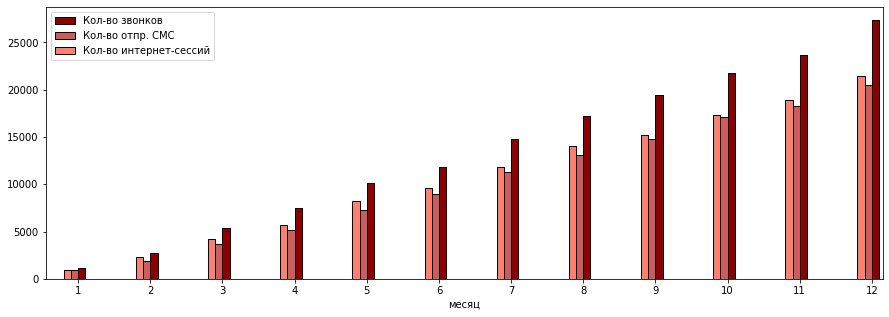

In [34]:
barplot_by_month([calls, messages, internet])

# Промежуточный вывод

Очевидно, что клиентами чаще использует тип связи - звонки. СМС имеет наименьший показатель. Количество интернет-сессий имеет среднее значение в сравнении с остальными типами связи. 

Также следует отметить, что данные график свидетельствует о становлении тарифа оператора мобильной связи. Так как в Январе месяце был запуск и показатели наиболее низкие. Далее наблюдается стабильная тенденция роста и к Декабрю месяцу - итог развития за целый год.

Рассмотрим историю одного пользователя - например, с id "1000".

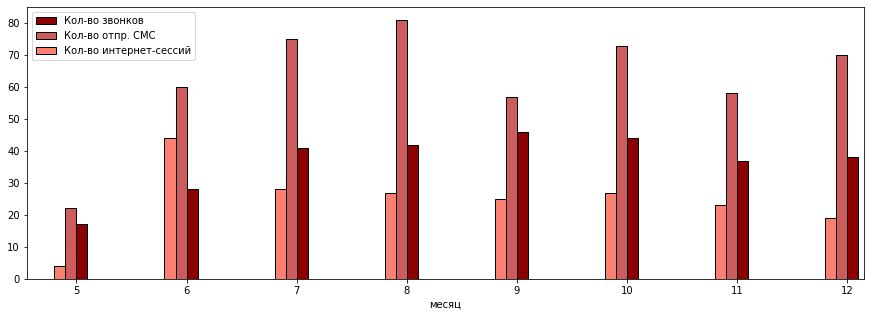

In [35]:
barplot_by_month([calls, messages, internet], query='user_id == 1000')

Следует обратить внимание на тот факт, что данные вариативны. Скорей всего было запущено 2 новых тарифа оператом мобильной связи и мы собираем данные за 1ый год их работы.

### Создадим новый датафрейм.

Воспользуемся имеющимися датареймами и из каждого возьмом нужную для нас информацию. Новый датафрейм назовем - df_event_numbers.

In [36]:
num_of_calls = calls.groupby(['user_id', 'время года', 'месяц'])['duration'].agg(['count', 'sum'])
num_of_messages = messages.groupby(['user_id', 'время года', 'месяц'])['id'].count()
num_of_internet = internet.groupby(['user_id', 'время года', 'месяц']).sum()['mb_used']

In [37]:
df_event_numbers = pd.concat([num_of_calls, num_of_messages, num_of_internet], axis=1)
df_event_numbers = df_event_numbers.reset_index()
df_event_numbers.head(10)

,user_id,время года,месяц,count,sum,id,mb_used
0,1000,весна,5,17.0,159.0,22.0,2256.0
1,1000,зима,12,38.0,333.0,70.0,9827.0
2,1000,лето,6,28.0,172.0,60.0,23257.0
3,1000,лето,7,41.0,340.0,75.0,14016.0
4,1000,лето,8,42.0,408.0,81.0,14070.0
5,1000,осень,9,46.0,466.0,57.0,14581.0
6,1000,осень,10,44.0,350.0,73.0,14717.0
7,1000,осень,11,37.0,338.0,58.0,14768.0
8,1001,зима,12,47.0,414.0,NaN,14053.0
9,1001,осень,11,45.0,430.0,NaN,18452.0


### Добавим столбец  "Тариф"

In [38]:
map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
df_event_numbers['Тариф'] = df_event_numbers['user_id'].map(map_to_fill_tariff)

map_to_fill_city = dict(pd.Series(users['city'].values, index=users['user_id']))
df_event_numbers['Город'] = df_event_numbers['user_id'].map(map_to_fill_city)

Для удобства переименуем названия столбцов.

In [39]:
df_event_numbers.columns = ['User_id', 'Время года', 'Месяц', 'Кол-во звонков, шт.', 'Звонки, мин.', 
                            'СМС, шт.', 'Интернет, Мб', 'Тариф', 'Город']

Посмотрим на полученный результат.

In [40]:
df_event_numbers.sort_values(by=['User_id', 'Месяц']).head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар
9,1001,осень,11,45.0,430.0,NaN,18452.0,smart,Москва
8,1001,зима,12,47.0,414.0,NaN,14053.0,smart,Москва


In [41]:
df_event_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
User_id                3214 non-null int64
Время года             3214 non-null object
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3168 non-null float64
Звонки, мин.           3168 non-null float64
СМС, шт.               2717 non-null float64
Интернет, Мб           3201 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 226.1+ KB


In [42]:
df_event_numbers[df_event_numbers['Интернет, Мб'].isnull()]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город
592,1094,весна,5,12.0,107.0,3.0,NaN,ultra,Новосибирск
1722,1273,весна,5,19.0,220.0,21.0,NaN,ultra,Курган
1723,1273,зима,12,38.0,260.0,39.0,NaN,ultra,Курган
1724,1273,лето,6,28.0,230.0,38.0,NaN,ultra,Курган
1725,1273,лето,7,30.0,253.0,37.0,NaN,ultra,Курган
1726,1273,лето,8,39.0,253.0,41.0,NaN,ultra,Курган
1727,1273,осень,9,28.0,223.0,32.0,NaN,ultra,Курган
1728,1273,осень,10,35.0,315.0,35.0,NaN,ultra,Курган
1729,1273,осень,11,31.0,272.0,29.0,NaN,ultra,Курган
2307,1365,осень,10,5.0,43.0,1.0,NaN,smart,Ростов-на-Дону


### Произведем заполнение имеющихся пропусков.

Наблюдаются пропуски по каждому столбцу. Можно предположить, что некоторые пользователи за рассматриваемый период времени или:

- ни разу не звонили;
- ни разу не отправляли СМС;
- ни разу не выходили в интернет. 

Проверим имеются ли у нас пользователи, которые ни разу не звонили, не отправляли смс и не заходили в интернет.

In [43]:
df_event_numbers[(df_event_numbers['Интернет, Мб'].isnull()) & (df_event_numbers['СМС, шт.'].isnull()) &
                 (df_event_numbers['Звонки, мин.'].isnull())]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город


# Промежуточный вывод

Как мы можем заметить, что данных пользователей не имеется. Каждый из клиентов является активным пользователем мобильной связи. Скорей всего клиент не пользовался каким-то типом связи в определенный период времени. 

В связи с чем, следует установить нулевое значение по имеющимся пропускам, которое будет означать, что в конкретном месяце данный клиент не звонил/не отправлял СМС/не пользовался интернетом.

In [44]:
df_event_numbers = df_event_numbers.fillna(0)

In [45]:
df_event_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
User_id                3214 non-null int64
Время года             3214 non-null object
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3214 non-null float64
Звонки, мин.           3214 non-null float64
СМС, шт.               3214 non-null float64
Интернет, Мб           3214 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 226.1+ KB


## Иследовательский анализ данных

### Произведем сравнительный анализ количества пользователей и частоты использования тарифных планов и видов связи.

Рассмотрим поближе какая часть клиентов использует определенный тариф. 

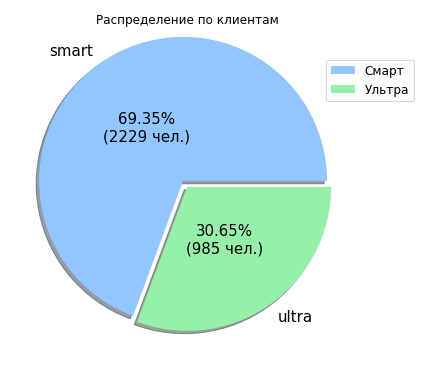

In [46]:
all_users = df_event_numbers['User_id'].count()


def func_pct(pct):
    value = float(pct/100.*all_users)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')['User_id'].count().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Распределение по клиентам', pctdistance=0.45,
                                                                     figsize=(20,5), autopct=lambda pct: func_pct(pct))

plt.tight_layout(pad=0)

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), prop={'size':12})
    ax.set_ylabel('')

# Промежуточный вывод

На основании данного графика мы можем констарировать, что 69,35% клиентов используют тариф - "Smart".

Рассмотрим поближе частоту использования:

- количество израсходованных минут разговора по видам тарифа;
- количество отправленных сообщений по видам тарифа;
- объем израсходованного интернет-трафика по месяцам.

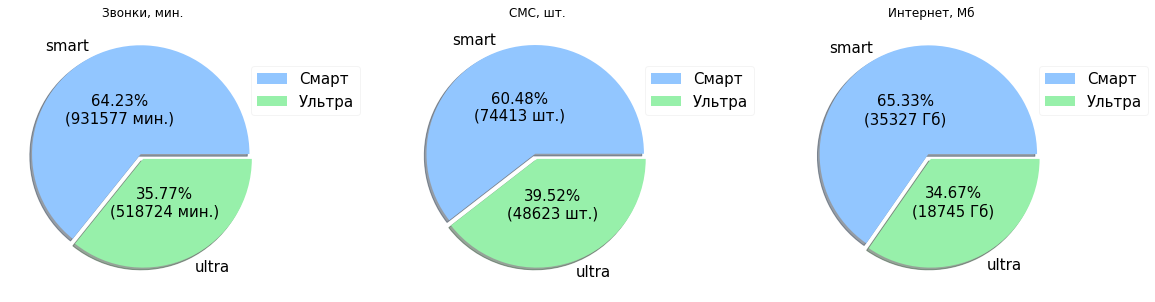

In [47]:
columns_to_plot = ['Звонки, мин.', 'СМС, шт.', 'Интернет, Мб']

calls_sum = df_event_numbers['Звонки, мин.'].sum()
sms_sum = df_event_numbers['СМС, шт.'].sum()
internet_sum = df_event_numbers['Интернет, Мб'].sum()

def func_pct(pct):
    if pct > 65 or pct < 35:
        sum_of_data = internet_sum
        value = float(pct/100.*sum_of_data/1024)
        metric = 'Гб'
    elif pct > 64 or pct < 36:
        sum_of_data = calls_sum
        value = float(pct/100.*sum_of_data)
        metric = 'мин.'
    else:
        sum_of_data = sms_sum
        value = float(pct/100.*sum_of_data)
        metric = 'шт.'
    return "{:.2f}%\n({:.0f} {})".format(pct, value, metric)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')[columns_to_plot].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                       use_index=False, shadow=True, explode=explode,
                                                                       title = columns_to_plot, pctdistance=0.45,
                                                                       autopct=lambda pct: func_pct(pct), figsize=(20,5))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], framealpha=0.2, bbox_to_anchor=(0.87,0.87), prop={'size':15})
    ax.set_ylabel('')

# Промежуточный вывод

На основании данного графика мы можем констарировать, что тенденция использования клиентами тарифа - "Smart" сохраняется:

- израсходованных минут по тарифу - "Smart" на 412 853 минут больше;
- отправленных смс по тарифу - "Smart" на 25 790 смс больше, чем по тарифу - "Ultra";
- объем израсходованных Мб интернет-трафика по тарифу "Smart" на 16 582 Гб (сразу перевели из Мб в Гб, поделив на 1024), чем по тарифу - "Ultra".

### Добавим информации о помесячной выручке с каждого пользователя.

Разобьем на 3 группы столбцов:

- "Абон. плата";
- "Минуты сверх", "СМС сверх", "Мб сверх", "Плата сверх лимита";
- "Сумма за месяц".


Для создания столбца "Абон. плата" следует создать словарь и на основании его добавим новые данные в датафрейм.

In [48]:
month_price = {'smart': 550, 'ultra': 1950}
df_event_numbers['Аб. плата, руб.'] = df_event_numbers['Тариф'].map(month_price)

Напишем функцию для создания столбцов:
- "Минуты сверх";
- "СМС сверх";
- "Мб сверх";
- "Плата сверх лимита"

которая будет считать превышения в зависимости от тарифа.

In [49]:
def calls_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Звонки, мин.'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Звонки, мин.'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['СМС, шт.'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['СМС, шт.'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Интернет, Мб'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Интернет, Мб'] - 30 * 1024
        return np.where(result > 0, result, 0)

def month_revenue(row):
    sum_per_month = 0
    if row['Тариф'] == 'smart':
        sum_per_month += np.ceil(row['Минуты сверх']) * 3
        sum_per_month += row['СМС сверх'] * 3
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['Минуты сверх']) * 1
        sum_per_month += row['СМС сверх'] * 1
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 150
        return sum_per_month

Напишем функцию для создания столбцов.

In [50]:
df_event_numbers['Минуты сверх'] = df_event_numbers.apply(calls_over_plan, axis=1)
df_event_numbers['СМС сверх'] = df_event_numbers.apply(sms_over_plan, axis=1)
df_event_numbers['Мб сверх'] = df_event_numbers.apply(internet_over_plan, axis=1)

df_event_numbers['Плата сверх лимита, руб.'] = df_event_numbers.apply(month_revenue, axis=1)

for column in ['Минуты сверх', 'Мб сверх']:
    df_event_numbers[column] = df_event_numbers[column].astype('float')

for column in ['СМС сверх', 'Плата сверх лимита, руб.']:
    df_event_numbers[column] = df_event_numbers[column].astype('int')
    
df_event_numbers.head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб."
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1950,0.0,0,0.0,0
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1950,0.0,0,0.0,0
8,1001,зима,12,47.0,414.0,0.0,14053.0,smart,Москва,550,0.0,0,0.0,0
9,1001,осень,11,45.0,430.0,0.0,18452.0,smart,Москва,550,0.0,0,3092.0,800


Для создания столбца "Сумма за месяц" следует построчно просуммировать данные по двум созданным столбцам: 

- "Аб. плата"; 
- "Плата сверх лимита".

In [51]:
df_event_numbers['Сумма за месяц, руб.'] = df_event_numbers['Аб. плата, руб.'] + df_event_numbers['Плата сверх лимита, руб.']

Посмотрим на полученный результат.

In [52]:
df_event_numbers.head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
8,1001,зима,12,47.0,414.0,0.0,14053.0,smart,Москва,550,0.0,0,0.0,0,550
9,1001,осень,11,45.0,430.0,0.0,18452.0,smart,Москва,550,0.0,0,3092.0,800,1350


Посмотрим имеются ли клиенты, которые превышали лимиты.

In [53]:
df_event_numbers[df_event_numbers['Сумма за месяц, руб.'] > 1950]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
68,1009,лето,7,20.0,183.0,14.0,24752.0,smart,Пермь,550,0.0,0,9392.0,2000,2550
69,1009,лето,8,27.0,249.0,9.0,23738.0,smart,Пермь,550,0.0,0,8378.0,1800,2350
81,1011,зима,12,44.0,361.0,6.0,22900.0,smart,Самара,550,0.0,0,7540.0,1600,2150
84,1011,лето,8,58.0,515.0,15.0,21526.0,smart,Самара,550,15.0,0,6166.0,1445,1995
87,1011,осень,11,52.0,501.0,12.0,25332.0,smart,Самара,550,1.0,0,9972.0,2003,2553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1496,лето,8,62.0,527.0,41.0,23560.0,smart,Вологда,550,27.0,0,8200.0,1881,2431
3200,1496,осень,9,58.0,486.0,29.0,26970.0,smart,Вологда,550,0.0,0,11610.0,2400,2950
3201,1496,осень,10,56.0,450.0,35.0,28215.0,smart,Вологда,550,0.0,0,12855.0,2600,3150
3202,1496,осень,11,66.0,662.0,46.0,25092.0,smart,Вологда,550,162.0,0,9732.0,2486,3036


# Промежуточный вывод

По результатам проведенной работы, мы видим, что имеются клиенты, которые превышали ежемесячные лимиты по каждому из видов тарифов.

### Произведем анализ данных по переплатам (дополнительный пакет услуг).

Создадим новый столбец -"Не хватило тарифного плана". Классификация будет совершаться по категориям:

- "0" - клиент не превышал месячные лимиты тарифа;
- "1" - превышал.

Напишем функцию.

In [54]:
df_event_numbers['Не хватило тарифного плана'] = np.where(df_event_numbers['Плата сверх лимита, руб.'] > 0, 1, 0)

Построим круговую диаграмму по каждому виду тарифного плана. Проанализируем какая часть клиентом мобильного оператора "Мегалайн" по истечению месячного тарифа, оплачивают дополнительный пакет услуг.

Напишем функцию.

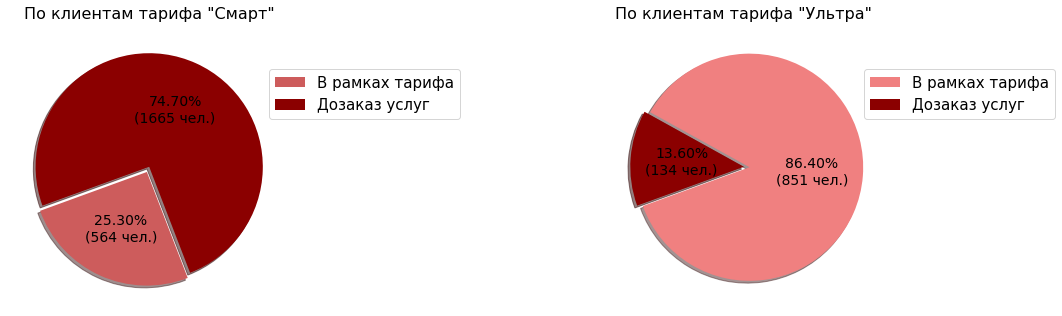

In [55]:
filter_list = ['smart', 'ultra']
titles_list = ['По клиентам тарифа "Смарт"', 'По клиентам тарифа "Ультра"']
rows = 1
cols = 2
filter_list_counter = 0

sum_smart = df_event_numbers[df_event_numbers['Тариф'] == 'smart'].count()['User_id']
sum_ultra = df_event_numbers[df_event_numbers['Тариф'] == 'ultra'].count()['User_id']

annot_labels = ['В рамках тарифа', 'Дозаказ услуг']

def func_pct(pct):
    if pct < 75 and pct > 25:
        value = float(pct/100.*sum_smart)
    else:
        value = float(pct/100.*sum_ultra)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

fig, axes = plt.subplots(rows, cols, figsize=(20,10))

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

for r in range(rows):
    for c in range(cols):
        if filter_list[filter_list_counter] == 'smart':
            colors = ['indianred', 'darkred']
        else:
            colors = ['lightcoral', 'darkred']
        curr_filtered_df = df_event_numbers[df_event_numbers['Тариф'] == filter_list[filter_list_counter]].groupby('Не хватило тарифного плана')['User_id']
        ax = curr_filtered_df.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True, explode=explode,
                                           title=titles_list[filter_list_counter], pctdistance=0.55, figsize=(20,5),
                                           autopct=lambda pct: func_pct(pct), startangle=200, ax=axes[c], colors=colors,
                                           labels=None)

        filter_list_counter += 1

plt.tight_layout(pad=3)

for ax in axes:
    ax.legend(['В рамках тарифа', 'Дозаказ услуг'], bbox_to_anchor=(0.897,0.87), prop={'size':15})
    ax.set_ylabel('')
    ax.title.set_size(16)
    ax.title.set_position([0.5, 1.15])

# Промежуточный вывод

На основании графика мы можем констатировать, что при использовании тарифного плана "Смарт" практически в 75% случаев клиенту мобильной сети "Мегалайн" не хватает минут, смс или Гб заложенных в абонентскую плату. По причине чего клиент по истечению месячного тарифа, оплачивают дополнительный пакет услуг поверх абонентской платы.

И наоборот, большинству (86,40%) клиентам с тарифным планом "Ультра" хватает минут, смс и Гб заложенных в абонентскую плату. Однако в 13,60% случаев клиент по истечению месячного тарифа, оплачивают дополнительный пакет услуг поверх абонентской платы.
, кроме 13% - они тоже "дозаказывают" услуги вне поверх абонентской платы.

Рассмотрим гистограмму по переплатам поверх абоненской планы (месячного тарифа) по тарифу - "Смарт".

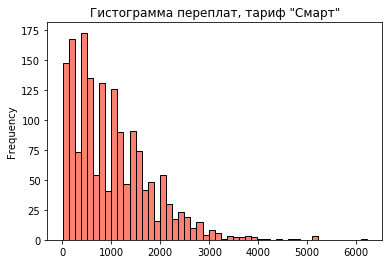

In [56]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') & 
                               (df_event_numbers['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, color='salmon', ec='black', bins=50)

# Промежуточный вывод

Большинство совершенных переплачивает достигает до 1200 рублей. При условии, что размер абонентской платы по тарифу - "Смарт" составляет - 550 рублей. Данная сумма переплат является большой, практически 3 раза больше.

Рассмотрим поближе по тарифу - "Смарт".

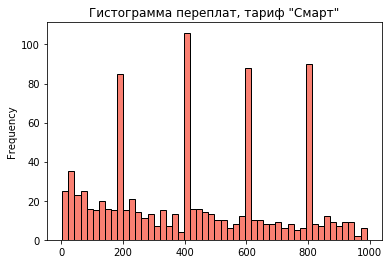

In [57]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered_less1000 = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') & 
                                        (df_event_numbers['Плата сверх лимита, руб.'] > 0) &
                                        (df_event_numbers['Плата сверх лимита, руб.'] < 1000)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, color='salmon', ec='black', bins=50)

# Промежуточный вывод

Большинство совершенных переплачивает кратны 200 рублей. Это значит, что клиенты оплачивают дополнительный пакет, а именно дозаказывают разное количество раз 1 Гб интернета стоимостью 200 рублей (за 1 Гб).

Рассмотрим гистограмму по переплатам поверх абоненской планы (месячного тарифа) по тарифу - "Ультра".

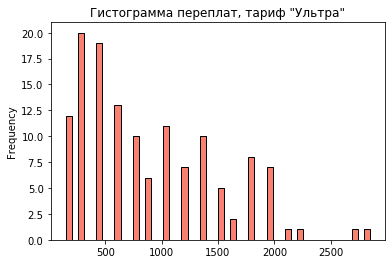

In [58]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') & 
                               (df_event_numbers['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, color='salmon', ec='black', bins=50)

# Промежуточный вывод

Большинство совершенных переплачивает достигает до 1500 рублей. При условии, что размер абонентской платы по тарифу - "Ультра" составляет - 1950 рублей. Данная сумма переплат является большой, практически кратна стоимости абонентской платы.

Рассмотрим гистограмму по тарифу - "Ультра".

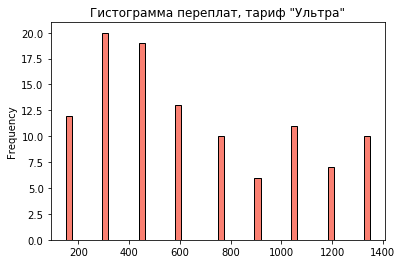

In [59]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered_less1000 = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') & 
                                        (df_event_numbers['Плата сверх лимита, руб.'] > 0) &
                                        (df_event_numbers['Плата сверх лимита, руб.'] < 1500)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, color='salmon', ec='black', bins=50)

# Промежуточный вывод

Большинство совершенных переплачивает кратны 150 рублей. Это значит, что клиенты оплачивают дополнительный пакет, а именно дозаказывают разное количество раз 1 Гб интернета, стоимостью 150 рублей (за 1 Гб).

### Сравнительный анализ суммарной выручки за год по каждому из видов тарифов.

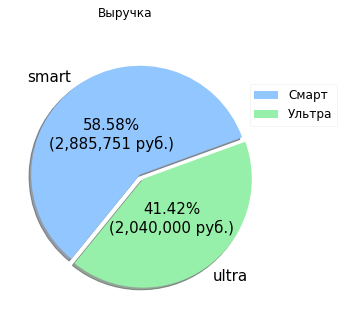

In [60]:
all_revenue = df_event_numbers['Сумма за месяц, руб.'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')['Сумма за месяц, руб.'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

# Промежуточный вывод

На основании данного графика мы можем констарировать, что 58,58% клиентов при использовании тарифа - "Smart" приносят 2 885 751 рублей выручки, что на 845 751 рублей больше, чем по тарифу - "Ультра."

Большинство людей пользуются тарифным планом "Смарт". Тенденция использования клиентами тарифа - "Smart" сохраняется и при израсходованных минут, отправленных смс по тарифу и объем израсходованных Мб интернет-трафика. Как следствие, большую часть выручки приносит тарифный план "Смарт", которая составляет 2 885 751 рублей, при условии, что абоненская плана по тарифному плану "Ультра" равна 1950 рублей, что больше в 3 раза, чем ежемесячная плата по тарифному плану "Смарт" (равна 550 рублей).

## Описание поведения клиента на основе полученной выборки.

### Представление информации о выбросах по каждому из набора данных.

Сначала построим boxplot по всем рассматриваемым данным:

- длительность звонка,;
- количество отправленных СМС;
- объем использованного интернет-трафика,

чтобы зафиксировать выбросы и отфильтровать их при дальнейшем анализе. Для начала зададим нижнее и верхнее значения усов через 2 и 98 квантили и построим один boxplot, потом построим boxplot со стандартным межквартильным размахом, равным 1,5.

Напишем функцию.

In [61]:
def plot_box(whis):
    column_list = ['Звонки, мин.', 'СМС, шт.', 'Интернет, Мб']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(40,15))

    for r in range(rows):
        for c in range(cols):
            ax = df_event_numbers.boxplot(column=column_list[column_list_counter], by='Тариф', fontsize=40, ax=axes[c],
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, whis=whis)
            ax.set_title(column_list[column_list_counter])
            ax.title.set_size(40)
            ax.set_xlabel('')
            plt.suptitle('Boxplot с whis = {}'.format(whis), y=1, fontsize=45, fontweight='bold')
            column_list_counter += 1

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

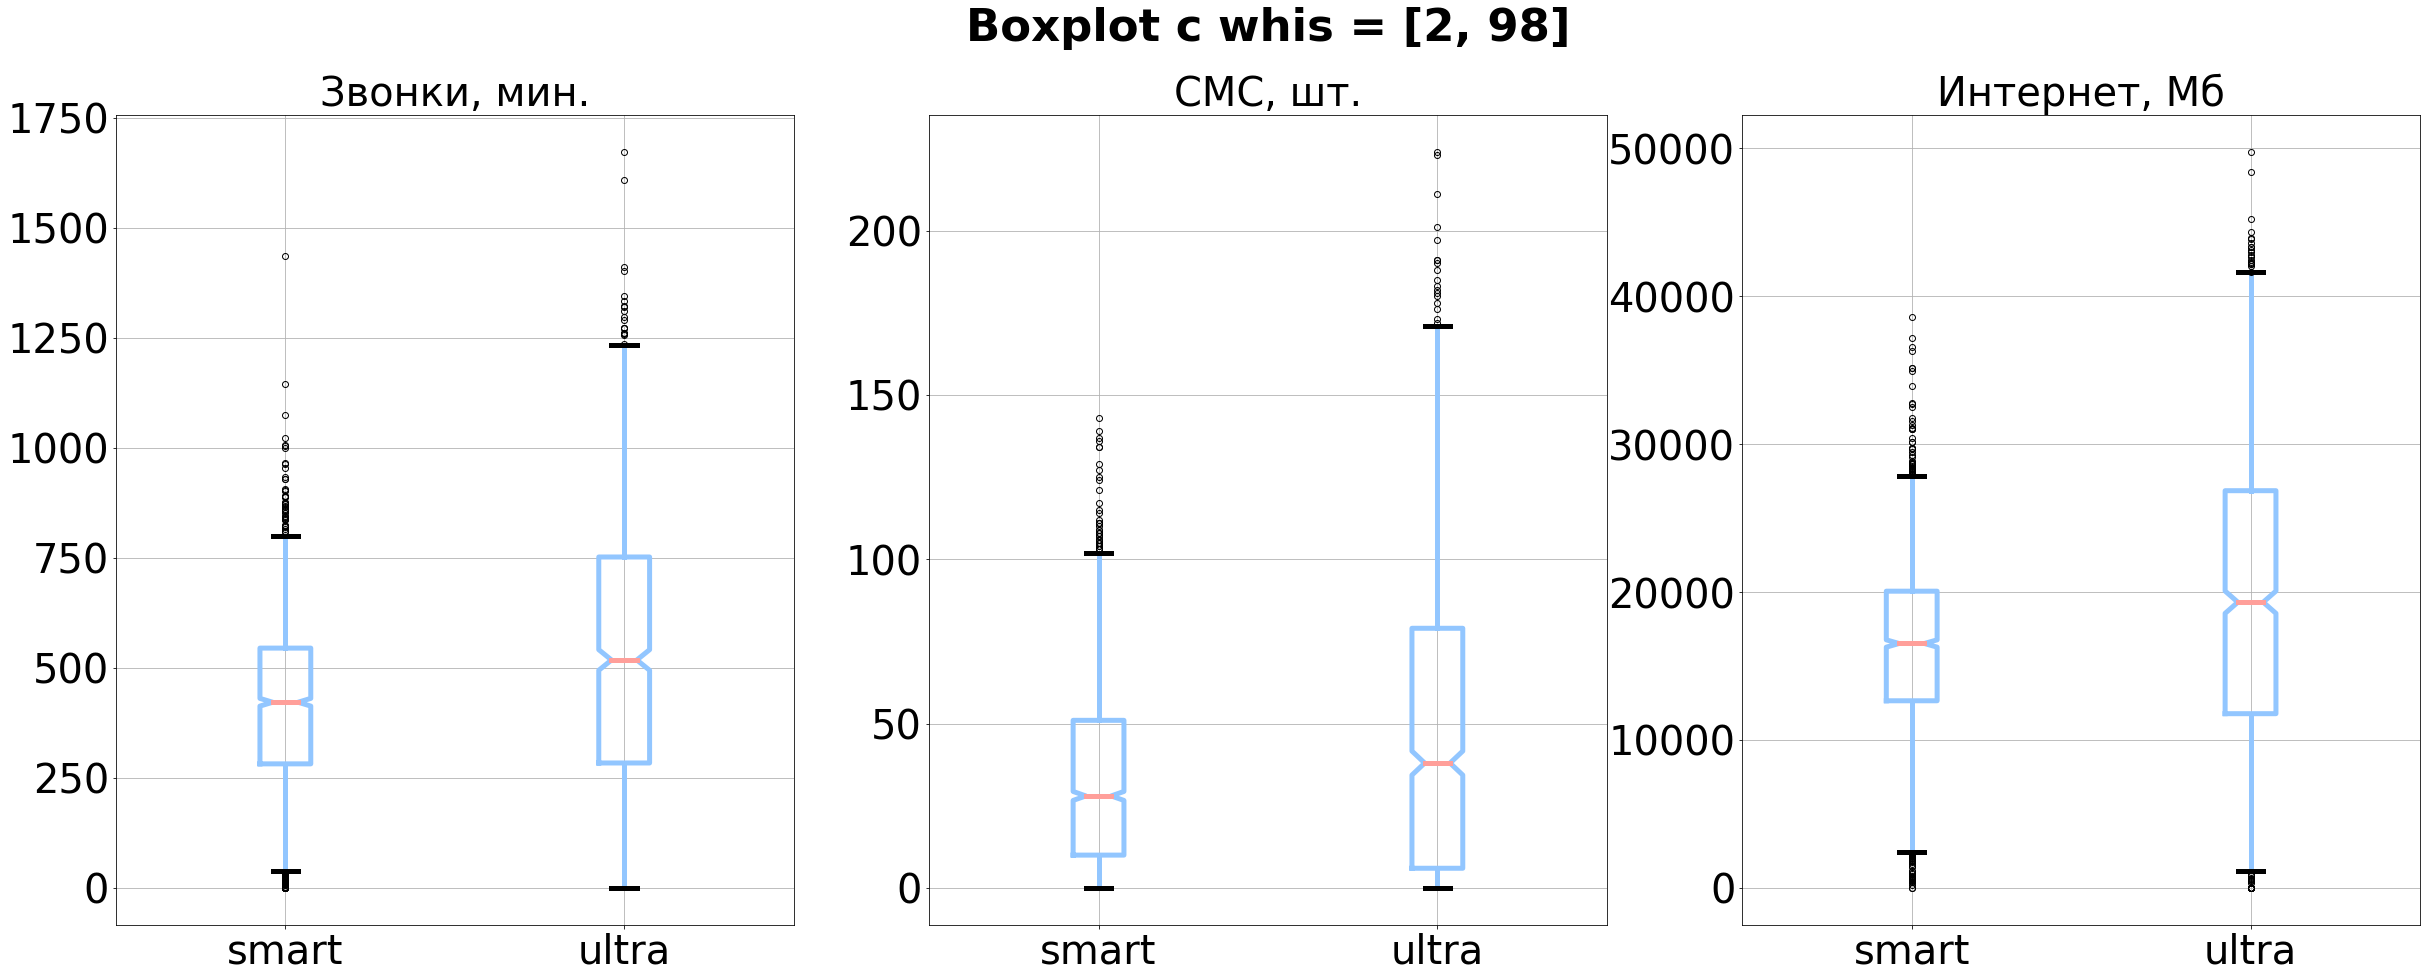

In [62]:
plot_box([2,98])

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

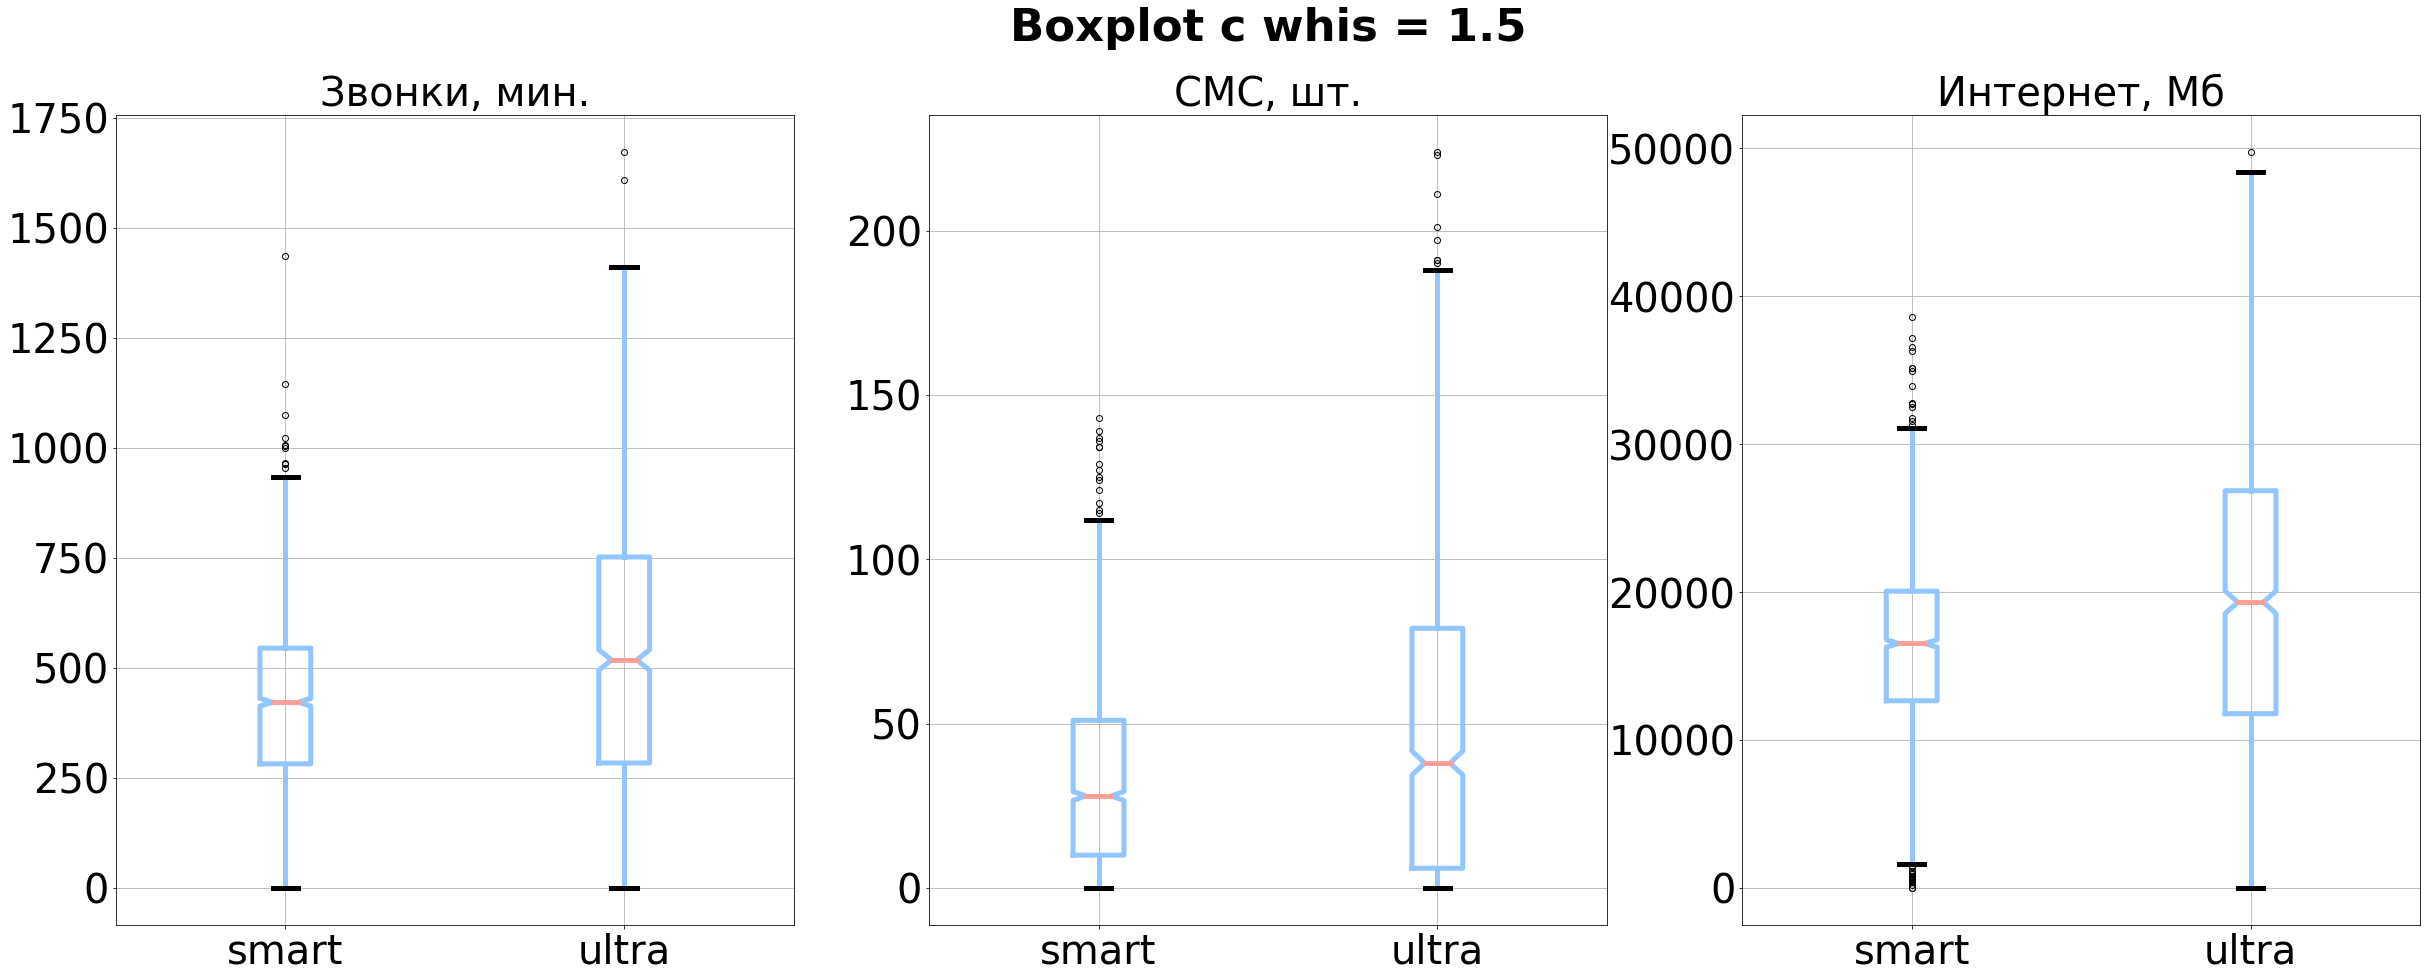

In [63]:
plot_box(1.5)

# Промежуточный вывод

При параметре whis = 1,5 аномалий отбрасывается меньше, другими словами, мы бережней фильтруем данные, чем при whis = 2,98.
В связи с этим, определим интервалы данных по boxplot с whis = 1,5.


### Определение интервалов данных для последующей их фильтрации.

Для этого напишем функцию, которая рассчитает данные интервалы.

In [64]:
def get_intervals(column, data_filter):
    
    if data_filter == 'Тариф':
        format_name = column
        data1, data2 = 'smart', 'ultra'
        format_end1 = 'тарифа "Смарт"'
        format_end2 = 'тарифа "Ультра"'
    elif data_filter == 'is_Moscow':
        format_name = 'is_Moscow'
        data1, data2 = 0, 1
        format_end1 = 'для регионов'
        format_end2 = 'для Москвы'
    
    q1_1 = df_event_numbers[df_event_numbers[data_filter] == data1][column].quantile(0.25)
    q3_1 = df_event_numbers[df_event_numbers[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    if data_filter == 'is_Moscow':
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 550, q1_1 - 1.5 * diff_1, 550)
    else:
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 0, q1_1 - 1.5 * diff_1, 0)
    
    right_int_1 = np.where( (q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = df_event_numbers[df_event_numbers[data_filter] == data2][column].quantile(0.25)
    q3_2 = df_event_numbers[df_event_numbers[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    if data_filter == 'is_Moscow':
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 550, q1_2 - 1.5 * diff_2, 550)
    else:
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 0, q1_2 - 1.5 * diff_2, 0)
        
    right_int_2 = np.where( (q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)

Найдем границы интервала по длительности звонков, по количеству отправленных СМС, по количеству использованного трафика.

In [65]:
calls_int_smart, calls_int_ultra = get_intervals('Звонки, мин.', 'Тариф')
sms_int_smart, sms_int_ultra = get_intervals('СМС, шт.', 'Тариф')
internet_int_smart, internet_int_ultra = get_intervals('Интернет, Мб', 'Тариф')

Границы интервала для столбца "Звонки, мин." тарифа "Смарт": 0.0 - 939.5
Границы интервала для столбца "Звонки, мин." тарифа "Ультра": 0.0 - 1454.0
Границы интервала для столбца "СМС, шт." тарифа "Смарт": 0.0 - 112.5
Границы интервала для столбца "СМС, шт." тарифа "Ультра": 0.0 - 188.5
Границы интервала для столбца "Интернет, Мб" тарифа "Смарт": 1543.0 - 31183.0
Границы интервала для столбца "Интернет, Мб" тарифа "Ультра": 0.0 - 49480.0


### Построим гистограммы по тарифам по длительности звонков, по количеству отправленных смс, по количеству потраченного интернет-трафика. 

В тоже время представим расчетные данные по среднему значению, дисперсии и стандартному отклонению.

Напишем функцию.

In [66]:
def plot_hist_comparison(data):
    
    ax = plt.gca()
    func_dict = {'Звонки': 'Звонки, мин.', 'СМС': 'СМС, шт.', 'Интернет': 'Интернет, Мб'}
    xlims = [(calls_int_smart[0], calls_int_smart[1]), (calls_int_ultra[0], calls_int_ultra[1]),
             (sms_int_smart[0], sms_int_smart[1]), (sms_int_ultra[0], sms_int_ultra[1]),
             (internet_int_smart[0], internet_int_smart[1]), (internet_int_ultra[0], internet_int_ultra[1])]
    
    filt_column = func_dict[data]

    # оформление в зависимости от рассматриваемых данных
    if data == 'Звонки':
        title = 'Гистограмма длительности звонков, мин.'
        xlim1 = xlims[0]
        xlim2 = xlims[1]
        text_x = (58, 8)
        text_y = 118
        count_text_x = 1150
        count_text_y = 75
        alpha = 0.8
        # annot_xy = (990, 60)
        # annot_xytext = (970, 70)
    elif data == 'СМС':
        title = 'Гистограмма количества отправленных СМС, шт.'
        xlim1 = xlims[2]
        xlim2 = xlims[3]
        text_x = (5.5, 1)
        text_y = 200
        count_text_x = 148
        count_text_y = 230
        alpha = 1
        # annot_xy = (133, 220)
        # annot_xytext = (130, 260)
    else:
        title = 'Гистограмма количества использованного интернет-трафика, Мб'
        xlim1 = xlims[4]
        xlim2 = xlims[5]
        text_x = (3300, 200)
        text_y = 130
        count_text_x = 38000
        count_text_y = 82
        alpha = 0.8
        # annot_xy = (31100, 73)
        # annot_xytext = (30400, 86)
    
    # получаем отфильтрованные от выбросов датафреймы
    filtered_smart_data = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') &
                                           (df_event_numbers[filt_column] >= xlim1[0]) &
                                           (df_event_numbers[filt_column] <= xlim1[1])][filt_column]
    filtered_ultra_data = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') &
                                           (df_event_numbers[filt_column] >= xlim2[0]) &
                                           (df_event_numbers[filt_column] <= xlim2[1])][filt_column]
    # рисуем
    filtered_smart_data.plot(kind='hist', bins=40, figsize=(12,6), ec='black', ax=ax, color='#92c6ff', 
                             title=title, xlim=xlim1)
    filtered_ultra_data.plot(kind='hist', bins=70, figsize=(12,6), ec='black', ax=ax, color='#97F0AA', 
                             title=title, xlim=xlim2, alpha=alpha)
    
    # расчетные данные
    mean_smart = filtered_smart_data.mean()
    mean_ultra = filtered_ultra_data.mean()
    dispersion_smart = filtered_smart_data.var()
    dispersion_ultra = filtered_ultra_data.var()
    std_smart = filtered_smart_data.std()
    std_ultra = filtered_ultra_data.std()
    
    if data == 'СМС':
        smart_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    else:
        smart_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    
    legend_second = plt.legend([smart_data, ultra_data], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    
    # рисуем медианы
    plt.axvline(x=filtered_smart_data.median(),linewidth=3, color='#16B4DC', linestyle='--')
    ax.text(filtered_smart_data.median()-text_x[0], text_y, '{0:.0f}'.format(filtered_smart_data.median()), 
            fontweight='bold', fontsize='large')
    plt.axvline(x=filtered_ultra_data.median(),linewidth=3, color='#35B815', linestyle='--')
    ax.text(filtered_ultra_data.median()+text_x[1], text_y, '{0:.0f}'.format(filtered_ultra_data.median()), 
            fontweight='bold', fontsize='large')
    
    plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})
    ax.text(count_text_x, count_text_y, 'Расчетные данные', fontweight='bold', fontsize='large')

Гистограмма длительности звонков.

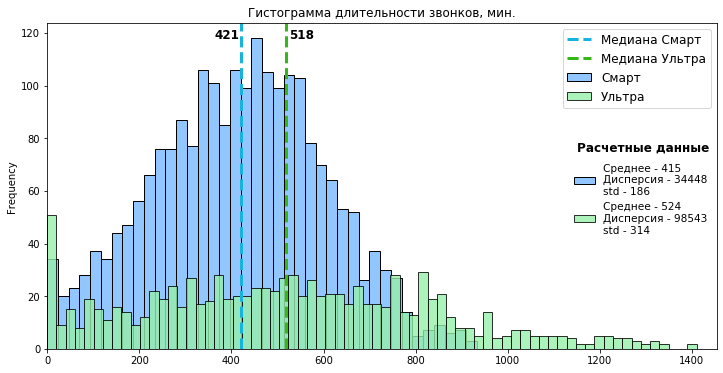

In [67]:
plot_hist_comparison('Звонки')

# Промежуточный вывод

Подводя промежуточные итоги, мы можем сказать, что по тарифному плану "Смарт" клиенты расходуют 250-550 минут в течении месяца. Среднее знаение - 415 минут. Медиана равна 421 минут, при условии, что в тариф включено 500 минут разговора. Можно заключить, что пользователи используют почти полный лимит по минутам.

По тарифному плану "Ультра" иная ситуация. Большая часть пользователей не используют в полной мере включенные 3000 минут разговора. Среднее значение составляет 524 минут. Медиана равна 518 минут.

В сравнии тарифного плана "Смарта" с "Ультра" медианное значение по "Ультра" больше на 97 минуты, среднее значение по "Ультра" больше на 109 минут.

Гистограмма количества отправленных СМС.

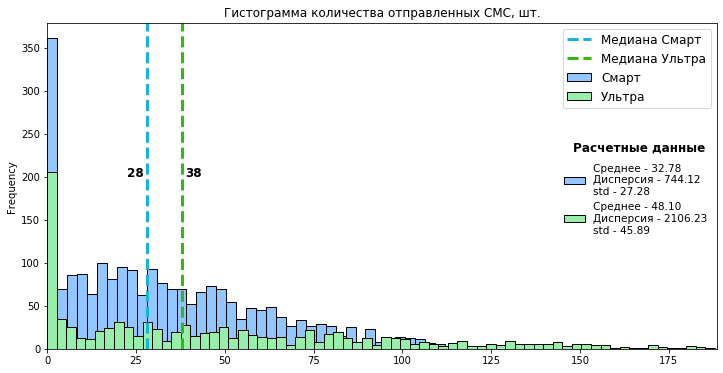

In [68]:
plot_hist_comparison('СМС')

# Промежуточный вывод

Подводя промежуточные итоги, мы можем сказать, что по тарифному плану "Смарт", что по тарифному плану "Ультра" ситуация схожа. Большинство клиентов толком не отправляют сообщения.

По тарифному плану "Смарт":

- медиана равна 28 смс;
- среднее значение 32,78 смс.

По тарифному плану "Ультра":

- медиана равна 38 смс;
- среднее значение 48,10 смс.

Однако, можно отметить, что сохраняется тенденция - более активная деятельность по тарифному плану "Ультра".

Гистограмма использованного интернет-трафику.

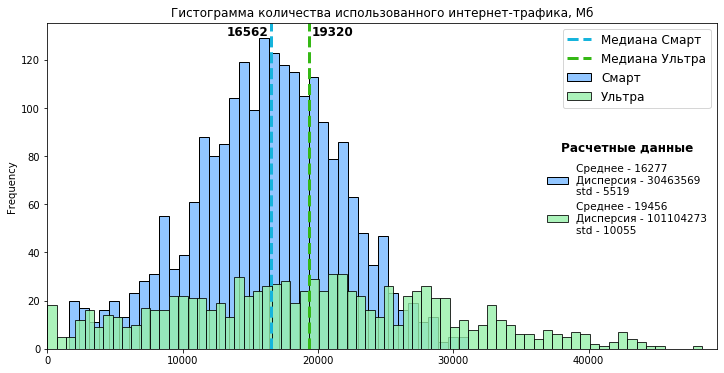

In [69]:
plot_hist_comparison('Интернет')

# Промежуточный вывод

В трифный план "Смарт" включено 15 Гб интернет-трафика. Клиенты в среднем используют от 14 до 20 Гб интернет-трафика. Медианное значение выходит за пределы трафного плана. Фактически, пользователи данного тарифа регулярно пользуются услугой покупкой дополнительного пакета интернет-трафика, когда основной пакет заканчивается.

По тарифному плану "Смарт":

- медиана равна 16,5 Гб;
- среднее значение 16,2 Гб.

В трифный план "Ультра" включено 30 Гб интернет-трафика. Медианное значение входит в пределы трафного плана. У пользователей по данному тарифу имеется запас по использованию объема интернет-трафика.

По тарифному плану "Ультра":

- медиана равна 19,3 Гб;
- среднее значение 19,4 Гб.

## Проверка гипотез

- H0 (нулевая гипотеза). Заключается в предположение - между данными не имется взаимосвязи. В данном случае, что средняя выручка пользователей по тарифному плану "Смарт" не отличается от средней выручки пользователей по тарифному плау "Ультра".
- H1 (альтернативная гипотеза). Заключается в мысли, что средняя выручка пользователей по тарифному плану "Смарт" отличается от средней выручки пользователей по тарифному плану "Ультру".

Сформируем выборку без аномалий.

Напишем функцию и представим ввиде графика для наглядности.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.93, 'Boxplot по выручке с whis = 1,5')

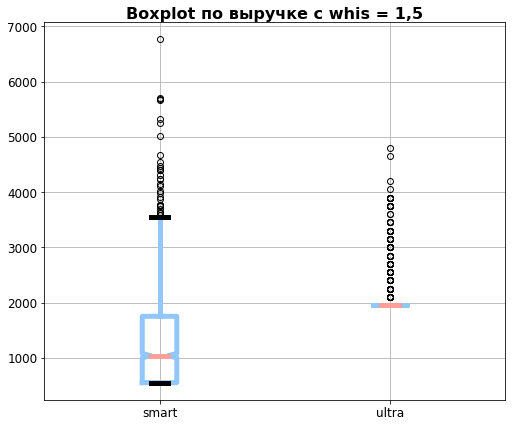

In [70]:
ax = df_event_numbers.boxplot(column='Сумма за месяц, руб.', by='Тариф', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))
ax.set_title('')
ax.title.set_size(40)
ax.set_xlabel('')
plt.suptitle('Boxplot по выручке с whis = 1,5', y=0.93, fontsize=16, fontweight='bold')

Посчитаем границы интервалов.

In [71]:
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'Тариф')

Границы интервала для столбца "Сумма за месяц, руб." тарифа "Смарт": 0.0 - 3550.0
Границы интервала для столбца "Сумма за месяц, руб." тарифа "Ультра": 1950.0 - 1950.0


Напишем функцию для получения данных, а именно - средней выручки по видам тарифных планов: "Смарт", "Ультра".

In [72]:
smart_mean_revenue = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') &
                                      (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                      (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

ultra_mean_revenue = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') &
                                      (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                      (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

### Расчет p-value.

Выборки у нас независимые. В связи с чем воспользуемся функцией ttest_ind из модуля scipy.stats.

In [73]:
from scipy.stats import ttest_ind

In [74]:
stat, p = ttest_ind(smart_mean_revenue, ultra_mean_revenue)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -27.932596508963062
p-value = 4.6244593529e-153

Пороговое значение alpha = 0.05


Представим это наглядно.

In [75]:
print('Средняя выручка по пользователям тарифа "Смарт" - {:.2f}'.format(smart_mean_revenue.mean()))
print('Средняя выручка по пользователям тарифа "Ультра" - {}'.format(ultra_mean_revenue.mean()))

Средняя выручка по пользователям тарифа "Смарт" - 1249.74
Средняя выручка по пользователям тарифа "Ультра" - 1950.0


# Промежуточный вывод

Из вышесказанного следует, что пользователи использующие тарифный план "Ультра" по среднему значению приносит компании "Мегалайн" наиболее большее значение выручки. Абонентская плата по тарифному плану "Ультра" (1950 рублей) превышает в 3,5 раза выше, чем стоимость по тарифному плану "Смарт" (550 рублей).
Клиенты использующие тарифный план "Смарт" в 75% случаев используют дополнительный пакет услуг, но данные расходы клиентов не сравнимы с расходами клиентов с тарифным планом "Ультра". 

### Гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Формирование выборок без аномалий:
Выберем нужные нам данные - среднюю месячную выручку по Москве и по остальным регионам:

Проставим признак по каждой строке - Москва или регион:

In [76]:
df_event_numbers['is_Moscow'] = np.where(df_event_numbers['Город'] == 'Москва', 1, 0)
df_event_numbers.head()

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб.",Не хватило тарифного плана,is_Moscow
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0


Построим boxplot'ы для вычисления выбросов.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


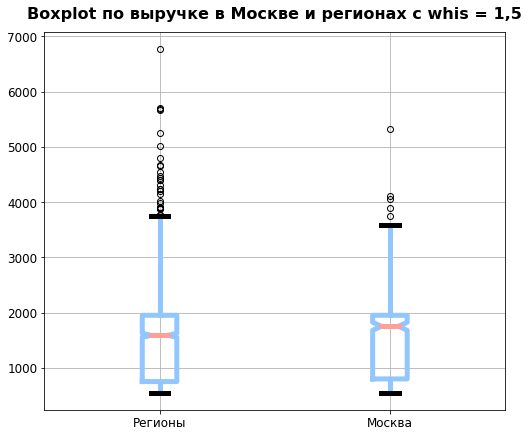

In [77]:
ax = df_event_numbers.boxplot(column='Сумма за месяц, руб.', by='is_Moscow', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Регионы'
labels[1] = 'Москва'

ax.set_xticklabels(labels)

plt.suptitle('Boxplot по выручке в Москве и регионах с whis = 1,5', y=0.95, fontsize=16, fontweight='bold')

ax.set_xlabel('')
ax.set_title('')
ax.title.set_size(40)

Рассчитаем границы интервалов.

In [78]:
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'is_Moscow')

Границы интервала для столбца "Сумма за месяц, руб." для регионов: 550.0 - 3750.0
Границы интервала для столбца "Сумма за месяц, руб." для Москвы: 550.0 - 3678.0


Выберем нужные данные - выручку по Москве и по регионам. Произведем расчеты.

In [79]:
moscow_revenue = df_event_numbers[(df_event_numbers['Город'] == 'Москва') &
                                  (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                  (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

regions_revenue = df_event_numbers[(df_event_numbers['Город'] != 'Москва') &
                                  (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                  (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

### Расчет p-value.

Выборки у нас независимые. В связи с чем воспользуемся функцией ttest_ind из модуля scipy.stats.

In [80]:
stat, p = ttest_ind(moscow_revenue, regions_revenue)
print('t = {}\np-value = {:.2}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.49291699198228
p-value = 0.14

Пороговое значение alpha = 0.05


Рассмотрим выручку по Москве и по регионам.

In [81]:
print('Средняя выручка по пользователю в месяц в Москве: {:.2f}'.format(moscow_revenue.mean()))
print('Средняя выручка по пользователю в месяц в регионах: {:.2f}'.format(regions_revenue.mean()))

Средняя выручка по пользователю в месяц в Москве: 1532.38
Средняя выручка по пользователю в месяц в регионах: 1483.28


# Промежуточный вывод

Нулевую гипотезу  нельзя отвергать.
Таким образом, можно сказать, что гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, является не верным. Так как, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. В Москве в среднем платят на 50 рублей больше, чем в регионах. Было бы странно, если бы эта разница являлось статистически значимой.

## Общий вывод

В результате проведеной проектной работе мной были рассмотрены данные нескольких датафреймов и совершена предобработка. Данные были проверены на наличие пропущенных значений и дублированных записей. Была произведена замена пропущенных значений. Заменены некорретные типы данных. Удалены дублирующие значения. Все данные стали представлены в удобном формате. На основании всего вышесказанного мы можем констатировать следующее:

- при использовании тарифного плана "Смарт" практически в 75% случаев клиенту мобильной сети "Мегалайн" не хватает минут, смс или Гб заложенных в абонентскую плату. По причине чего клиент по истечению месячного тарифа, оплачивают дополнительный пакет услуг поверх абонентской платы;
- большинству (86,40%) клиентам с тарифным планом "Ультра" хватает минут, смс и Гб заложенных в абонентскую плату. Однако в 13,60% случаев клиент по истечению месячного тарифа, оплачивают дополнительный пакет услуг поверх абонентской платы. , кроме 13% - они тоже "дозаказывают" услуги вне поверх абонентской платы;
- большинство совершенных переплачивает по тарифному плану "Смарт" достигает до 1200 рублей. Большинство совершенных переплачивает кратны 200 рублей. Это значит, что клиенты оплачивают дополнительный пакет, а именно дозаказывают разное количество раз 1 Гб интернета стоимостью 200 рублей (за 1 Гб);
- большинство совершенных переплачивает по тарифному плану "Ультра" достигает до 1500 рублей. При условии, что размер абонентской платы по тарифу - "Ультра" составляет - 1950 рублей. Данная сумма переплат является большой, практически кратна стоимости абонентской платы. Большинство совершенных переплачивает кратны 150 рублей. Это значит, что клиенты оплачивают дополнительный пакет, а именно дозаказывают разное количество раз 1 Гб интернета, стоимостью 150 рублей (за 1 Гб);
- большую часть выручки приносит тарифный план "Смарт", которая составляет 2 885 751 рублей;
- была констатирована альтернативная гипотеза;
- средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Таким образом, мы видим, что в тарифной сетке представлены: 

- дешевый тарифный план "Смарт "по стоимости 550 рублей, где пользователю не хватает объема интнерт-трафика и количество использованных минут разговора на грани лимита (418 минут из 500);
- тарифный план "Ультра" стоимостью 1950 рублей, который используют люди более высокого материального положения, где лимитов по всем типам связи предостаточно (иногда дозаказывают в среднем 1 Гб интернета).

Найденные и проанализированные мной данные позволяют предложить компании "Мегалайн" рассмотреть вариант о создании более комфортного тарифного плана для потенциальных клиентов и нынешних пользователей мобильной связи "Мегалайн". Чтобы пользователям не приходилось покупокать дополнительный пакет услгу, а именно объем интернет-трафика. Также, ценовая политика, чтобы новый тарифный план был промежуточным вариантом по цене между текущими, так как тарифный план "Смарт" состоит 550 рублев месяц, а тарифный план "Ультра" составляет 1950 рублей в месяц.